#### 20 de Noviembre, 2018

### Verónica Vélez Sampedro

# CREACIÓN DE UNA CONSOLA EXPERIMENTAL PARA EXTRAER INFORMACIÓN DEL NCBI Y SER USADA EN BIOINFORMÁTICA

Siempre que se tiene alguna necesidad bioinformática y de acceso a la información, muchas veces hay que recurrir a scripts que están dispersos en internet y no solucionan la problemática, lo cual, *per se*, hace pensar que hay una necesidad de crear una colección personal que pueda ser útil a mis investigaciones. Esto genera un interés en desarrollar una herramienta que pueda ser útil para solucionar algunos problemas que se vayan presentando sin necesidad de estar almacenando todo en scripts en un repositorio. Puede ser pensada como una herramienta que tenga un conjunto de comandos para solucionar distintos tipos de inquietudes a nivel investigativo.

Teniendo en cuenta lo anterior, no considero Jupyter como la plataforma más conveniente para generar dicha solución, porque, aunque se documenta muy bien allí y se puede compartir lo que se genere subiendo los notebooks a repositorios, hay que saber manejar muy bien la herramienta y además instalarla a través de Anaconda. En la solución aquí planteada, solo es necesario entregar una carpeta con un par de archivos en Python y un comando de inicio; en ellos se compilan las funciones que serán llamadas a través de comandos sencillos. De esta manera no hay que hacer comandos complejos, ni correr scripts complejos; por el contrario, la persona que lo use simplemente tiene que saber “qué decir” para “pedir” la información que necesite. 

Mi primera versión de la solución es la consola que aquí presento, para extraer información del NCBI y ser usada en bioinformática. Es una versión experimental donde lo que se trata de hacer es montar las características de mi consola; la cual va a trabajar con consultas en distintas librerías del NCBI, cabe aclarar que por el momento solamente trabaja con las librerías de nucleótidos y taxonomía. A partir de estas librerías, se accede a un formato de registros usando las librerías de BioPython y Entrez. En esas librerías, se usan comandos de consulta de información muy específica y se accede a los campos que devuelve el registro en formato XML. Se utiliza el formato XML ya que a este formato se puede acceder a través de BioPython sin ningún inconveniente. 

Este software en particular no debe ser corrido en este ambiente, ya que no está pensado para para correr en celdas de Jupyter sino para trabajar en la terminal del sistema operacional; así, se abre la consola BICHAS y los códigos corren en un segundo plano con Python. 


### ¿Como usar la consola?

En la carpeta llamada **bichas** está todo lo necesario para trabajar en la consola BICHAS. 
Para entrar desde la terminal del computador se necesita python3 y deben seguir los siguientes pasos:

1. Abrir la terminal del computador.

2. Seleccionar como directorio la carpeta **bichas** (donde esté guardada).

3. Escribir el comando:
    **python3 bichas.py**

*Nota: Este código está escrito para la versión 3.0 de Python. Versión 2.7 o inferior no va a trabajar.*

4. Leer el archivo **ReadMe.txt** ubicado en la misma carpeta. Así, se podrá familiarizar con el lenguaje de la consola, allí presentado.

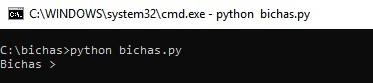


Si por alguna razón, al usuario no le corre Python en la línea de comando del computador, puede entrar a Anaconda y lanzar Spyder, una vez en Spyder, se abre el archivo “bichas.py” y se le da run (el botón “play” de la barra de herramientas); en ese momento está listo para ser usado.

Se han realizado pruebas de los códigos desde Spyder (que posee su terminal), donde BioPython funciona bien y la consola corre sin problemas.


## Metodología usada en la consola

Se creó un comando que permite consultar un registro por medio del ID del organismo utilizando Entrez para conectar con la base de datos del NCBI. Así, la librería de taxonomía está siendo consultada por ID; sin embargo, más adelante podrá ser consultada de otras maneras (nombre científico, por ejemplo). Dentro de las consultas a esta base de datos hay un comando llamado “ListarCampos” el cual va a permitir conocer qué campos trae el registro, y se pueden consultar los contenidos de cada uno de esos campos. En esta consola, algunos de esos contenidos arrojan listas y diccionarios, ya que en esta primera versión no se está presentando toda la información detallada, sino que se está permitiendo que se extraigan los campos tal cual como vienen de la base de datos. Por este motivo, en algunos casos existe la oportunidad de sacar cadenas de caracteres, y en otros simplemente listas y diccionarios; es decir, se está presentando esta información tal cual se tiene; no se está estructurándola todavía.

Para consultar la información de un organismo, no se usa la librería de taxonomía sino la de nucleótidos; sin embargo, ocurre lo mismo que se explicó anteriormente. Es decir, se usa el comando “ListarCampos” (realizado también para este caso) que permite listar los campos. Para ambos casos, se tiene la posibilidad de extraer la información de alguno de los campos con un comando específico y el nombre del campo; por ejemplo, **taxon.data Lineage** u **organismo.data GBSeq_sequence**, lo cual arroja la taxonomía y la secuencia de nucleótidos del organismo en cuestión, respectivamente.

Por otra parte, para consultar la cantidad de registros que se encuentran en la librería de nucleótidos respecto a un organismo, se creó el comando **secuencia.leer** que utiliza el nombre de un organismo como parámetro de entrada (por ejemplo: **orgn=Pithecellobium** ) y este a su vez posee la opción **secuencia.listarcampos** donde se consulta el número de registros, el número de Id que la consola puede presentar y una lista de Id pertenecientes a los registros encontrados. Este comando resultó pertinente para solucionar el problema de conocer el Id de un organismo para buscarlo en el comando **organismo.leer** que me genera la consulta inicial, en caso de que este fuese desconocido o simplemente quisiese corroborarse.

Esta metodología permitirá continuamente crear la herramienta que se quiere diseñar. Por el momento, como fue dicho, es experimental; todos los comandos se entran manual, no hay que escribir ningún script, ni montarlo a Jupyter para que corra. 

### Funciones detrás de la consola BICHAS

#### El siguiente script contiene la lista de funciones que se conectan directamente con la consola, es decir las que tienen interacción directa con los comandos que el usuario escriba con los requerimientos que necesite. Se encuentra en el archivo bichas.py

In [ ]:
import listaNCBI
import os
import platform

responseTaxon = None
responseSecuencias = None
responseOrganismo = None
ayudaPrompt = ""

def limpiarPantalla():
    if platform.system() == "Darwin" or platform.system() == "Linux":
        os.system("clear")
    if platform.system() == "Windows":
        os.system("cls")


def taxonLeer(params):
    global responseTaxon
    if params == None:
        print("ERROR: falta criterio de búsqueda")
        return

    print("\nConsultando base de datos en el servidor NCBI (puede tardar)...")
    responseTaxon = listaNCBI.leerRegistroDeTaxonomia(params)
    if len(responseTaxon) == 0:
        print("no se encontró nada con ese criterio.")
    else:
        print("---------------")
        taxonMostrarData("ScientificName")
    return

def leerOrganismo(params):
    global responseOrganismo
    if params == None:
        print("ERROR: falta id")
        return
    print("\nConsultando base de datos en el servidor NCBI (puede tardar)...")
    responseOrganismo = listaNCBI.leerOrganismo(params)
    if len(responseOrganismo) == 0:
        print("no se encontró nada con ese criterio.")
    else:
        print("---------------")
        organismoMostrarData("GBSeq_organism")
    return responseOrganismo

def leerIdSecuencias(params):
    global responseSecuencias

    if params == None:
        print("ERROR: falta criterio de búsqueda")
        return
  
    print("\nConsultando base de datos en el servidor NCBI (puede tardar)...")
    responseSecuencias = listaNCBI.leerIdSecuencias(params)
    if len(responseSecuencias) == 0:
        print("no se encontró nada con ese criterio.")
    else:
        print("---------------")
        print(responseSecuencias["Count"], "registros que cumplen.")
    return

def organismoListarCampos():
    global responseOrganismo   
    if responseOrganismo == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    print()
    print("------------------")
    organismoMostrarData("GBSeq_definition")
    print("------------------")
    lista = listaNCBI.listarCampos(responseOrganismo[0])
    for dato in lista:
        print(dato,end='\n')
    print()
    return

def taxonListarCampos():
    global responseTaxon   
    if responseTaxon == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    print()
    print("------------------")
    taxonMostrarData("ScientificName")
    print("------------------")
    lista = listaNCBI.listarCampos(responseTaxon[0])
    for dato in lista:
        print(dato,end='\n')
    print()
    return

def secuenciasListarCampos():
    global responseSecuencias   
    if responseSecuencias == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    print()
    print("------------------")
    secuenciasMostrarData("QueryTranslation")
    print("------------------")
    lista = listaNCBI.listarCampos(responseSecuencias)
    for dato in lista:
        print(dato,end='\n')
    print()
    return

def organismoMostrarData(campo):
    global responseOrganismo   
    if responseOrganismo == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    if campo == None:
        print("ERROR: falta campo")
        return
    dato = listaNCBI.leerCampoOrganismo(responseOrganismo, campo)
    print(dato)
    print()
    return

def taxonMostrarData(campo):
    global responseTaxon   
    if responseTaxon == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    if campo == None:
        print("ERROR: falta campo")
        return
    dato = listaNCBI.leerCampoTaxon(responseTaxon, campo)
    print(dato)
    print()
    return

def secuenciasMostrarData(campo):
    global responseSecuencias   
    if responseSecuencias == None:
        print("no ha consultado nada. Use el comando 'leer'.")
        return
    if campo == None:
        print("ERROR: falta campo")
        return
    dato = listaNCBI.leerCampoSecuencia(responseSecuencias, campo)
    print(dato,end='\n')
    return


def finalizar():
    global nomas 
    nomas = True
    return

def partacomando(linea):
    global nomas
    partes = linea.split(' ')
    dic={}
    if len(partes) > 1:
        comando = partes[0].upper()
        params = partes[1].split(';')
        for p in params:
            namevalue = p.split("=")
            if len(namevalue)<2:
                if not namevalue[0] in dic:
                    dic[""] = namevalue[0]
            else:
                if not namevalue[0] in dic:
                    dic[namevalue[0]] = namevalue[1]
    else:
        comando = partes[0].upper()
    return comando, dic

def leerComando(linea):
    global ayudaPrompt
    if len(linea)==0:
        return
    comando, params = partacomando(linea.strip())

    #comandos para que el usuario no tenga que escribir mucho....

    #comandos para fijar el tipo de acción...
    if comando == "TAXON.": ayudaPrompt="taxon."; return
    if comando == "ORGANISMO.": ayudaPrompt="organismo."; return
    if comando == "SECUENCIAS.": ayudaPrompt="secuencias."; return
    if comando == "TAXON.DATA.": ayudaPrompt="taxon.data"; return
    if comando == "ORGANISMO.DATA.": ayudaPrompt="organismo.data"; return
    if comando == "SECUENCIAS.DATA.": ayudaPrompt="secuencias.data"; return

    #comandos para quitar un tipo de acción fijo...
    if comando == "TAXON..": ayudaPrompt=""; return
    if comando == "ORGANISMO..": ayudaPrompt=""; return
    if comando == "SECUENCIAS..": ayudaPrompt=""; return
    if comando == "TAXON.DATA..": ayudaPrompt="taxon."; return
    if comando == "ORGANISMO.DATA..": ayudaPrompt="organismo."; return
    if comando == "SECUENCIAS.DATA..": ayudaPrompt="secuencias."; return

    #comandos para fijar las órdenes de listar campos...
    if comando == "TAXON.LISTARCAMPOS": taxonListarCampos(); return
    if comando == "ORGANISMO.LISTARCAMPOS": organismoListarCampos(); return
    if comando == "SECUENCIAS.LISTARCAMPOS": secuenciasListarCampos(); return
    if comando == "LIMPIAR": limpiarPantalla(); return
    if comando == "FIN": finalizar(); return

    if len(params) > 0:
        #comandos que requieren sólo un parámetro por el momento.....
        if comando == "TAXON.DATA": taxonMostrarData(params[""]);return
        if comando == "ORGANISMO.DATA": organismoMostrarData(params[""]);return
        if comando == "SECUENCIAS.DATA": secuenciasMostrarData(params[""]);return

        #comandos que necesitan parámetros
        if comando == "TAXON.LEER" : taxonLeer(params);return
        if comando == "ORGANISMO.LEER" : leerOrganismo(params);return
        if comando == "SECUENCIAS.LEER" :leerIdSecuencias(params);return

    print("Comando sin efecto, o falta parámetro, o el comando es desconocido.")


def pedirComando():
    global ayudaPrompt
    while (not nomas):
        linea = input("Bichas > "+ayudaPrompt)
        linea = ayudaPrompt+linea
        leerComando(linea)

def main():
    global nomas
    nomas = False
    pedirComando()

main()

#### Por otra parte, el script siguiente contiene la lista de funciones que las funciones presentadas anteriormente llaman para que ejecuten la acción requerida, es decir las que se conectan directamente con el NCBI para descargar la información. Se encuentra en el archivo listaNCBI.py

In [ ]:
from Bio import Entrez

def leerCampoSecuencia(entrezResponse, campo):
    data = entrezResponse.get(campo)
    lista = []
    if data is dict:
        for entry in data:
            lista.append(entry)
        return lista
    else:
        return data

def leerCampoTaxon(entrezResponse, campo):
    data = entrezResponse[0].get(campo)
    lista = []
    if data is dict:
        for entry in data:
            lista.append(entry)
        return lista
    else:
        return data

def leerCampoOrganismo(entrezResponse, campo):
    data = entrezResponse[0].get(campo)
    return data

def listarCampos(entrezResponse):
    lista = []
    for campo in entrezResponse.keys():
        lista.append(campo)
    return lista

def leerOrganismo(params):
    Entrez.email = 'vvelezs@eafit.edu.co' 
    ident = ""
    if "id" in params:
        ident = params["id"]
    else:
        ident = params[""]
    handle = Entrez.efetch(db="nucleotide", id=ident, rettype="gb", retmode="XML")
    return Entrez.read(handle)

def leerIdSecuencias(params):
    Entrez.email = 'vvelezs@eafit.edu.co'
    consulta=None
    if "orgn" in  params:
        consulta= params["orgn"]+"[ORGN]"
    handle = Entrez.esearch(db="nucleotide", term=consulta, idtype="acc")
    return Entrez.read(handle)

def leerRegistroDeTaxonomia(params):
    Entrez.email = 'vvelezs@eafit.edu.co' 
    id = ""
    if "id" in params:
        id = params["id"]
    else:
        id = params[""]
    handle = Entrez.efetch('taxonomy', id=id, rettype='xml')
    response = Entrez.read(handle)
    return response

### Comandos para usar en la consola

La consola puede consultar información de taxonomía, organismos, secuencias; y los comandos actualmente disponibles para cada uno son:

---
**Taxonomía (conectada a la librería de taxonomía del NCBI)**

*taxon.leer* Este comando requiere el parámetro **Id=** 
             Muestra el nombre del organismo buscado.

*taxon.listarcampos* Este comando fija las órdenes de listar campos.
                     Muestra los campos de información que trae el registro.
                     
*taxon.data* Este comando requiere solo un parámetro (campo).
             Muestra la información contenida en el campo especificado.
             
---
*taxon.* Este comando fija el tipo de acción.

*taxon..* Este comando quita un tipo de acción fijo.

*taxon.data.* Este comando fija el tipo de acción.

*taxon.data..* Este comando quita un tipo de acción fijo.

---

**Organismos (conectada a la librería de nucleótidos del NCBI)**

*organismo.leer* Este comando requiere el parámetro **Id=**
                 Muestra el nombre del organismo buscado.

*organismo.listarcampos* Este comando fija las órdenes de listar campos.
                         Muestra los campos de información que trae el registro.

*organismo.data* Este comando requiere solo un parámetro (campo).
                 Muestra la información contenida en el campo especificado.
                 
---
*organismo.* Este comando fija el tipo de acción.

*organismo..* Este comando quita un tipo de acción fijo.

*organismo.data.* Este comando fija el tipo de acción.

*organismo.data..* Este comando quita un tipo de acción fijo.

---

**Secuencias (conectada a la librería de nucleótidos del NCBI)**

*secuencias.leer* Este comando requiere el parámetro **orgn=** (organismo).
                  Muestra el número de registros de secuencias para ese organismo.

*secuencias.listarcampos* Este comando fija las órdenes de listar campos.
                          Muestra los campos de información que trae el registro.

*secuencias.data* Este comando requiere solo un parámetro (campo).
                  Muestra la información contenida en el campo especificado.

---
*secuencias.* Este comando fija el tipo de acción.

*secuencias..* Este comando quita un tipo de acción fijo.

*secuencias.data.* Este comando fija el tipo de acción.

*secuencias.data..* Este comando quita un tipo de acción fijo.

---

**Comandos generales**

*limpiar* Este comando fija el tipo de acción: Limpiar la pantalla, pero seguir dentro de la consola.

*fin* Este comando fija el tipo de acción: Salir de la consola BICHAS.

---
*Nota:*

*Los comandos con . (un punto) al final, son para permanecer de forma fija dentro del comando dado.*

*Los comandos con .. (dos puntos) al final, son para salir del comando fijado previamente y utilizar otro comando distinto.*


## Resultados de las pruebas a la consola

Iniciando en la librería de taxonomía, se utiliza el comando **taxon.leer 404691** correspondiente a *Pithecellobium dulce*, nombre que aparece una vez encontrado el registro: 

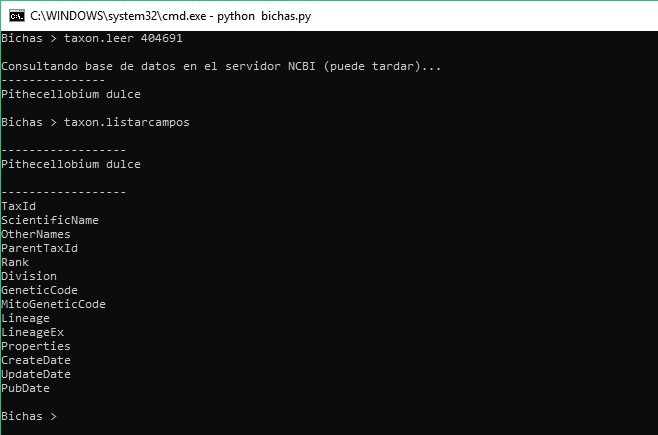


Con el comando **taxon.listarcampos** se muestra qué dentro del registro de taxonomía se puede consultar, por ejemplo, el linaje, el Id de la taxa parental, a qué tabla corresponde el código genético, entre otros aspectos.

**taxon.data.** (añadiendo un punto al final del comando) me permite buscar un campo tras otro sin necesidad de volver a escribir este comando; simplemente añadiendo el nombre del campo a consultar, por ejemplo, Lineage o ParentTaxId:

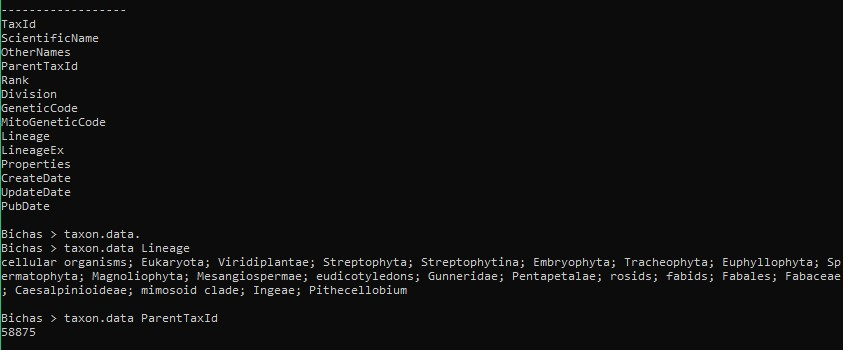


Al salir de los campos con **taxon.data..** (añadiendo dos puntos al final del comando), puedo volver al comando de lectura para buscar el Id de la taxa parental de *Pithecellobium dulce*, y en efecto el resultado es *Pithecellobium*:

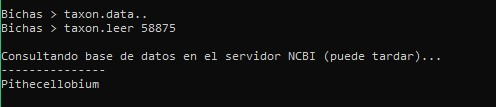


*Nota: Los ID entre bases de datos del NCBI (taxonomía y nucleótidos) cambian, personalmente considero esto una falencia en la eficiencia de búsquedas (desde la fuente que es el NCBI); sin embargo, posteriormente pueda mejorarse este aspecto en esta consola al buscar por el nombre del organismo y filtrar la búsqueda de forma más específica.*

Saliendo de la base de datos de taxonomía utilizando el comando **taxon..** (con dos puntos al final) se busca (para ejemplificar la nota anterior) el mismo ID en la base de datos de nucleótidos con el comando **organismo.leer 404691**	El resultado indica que corresponde al VIH-1. 
Se listan los campos que contiene este registro usando **organismo.listarcampos** y se observa que se pueden realizar consultas sobre la taxonomía, la secuencia, la topología de la secuencia, la longitud, entre otros aspectos.

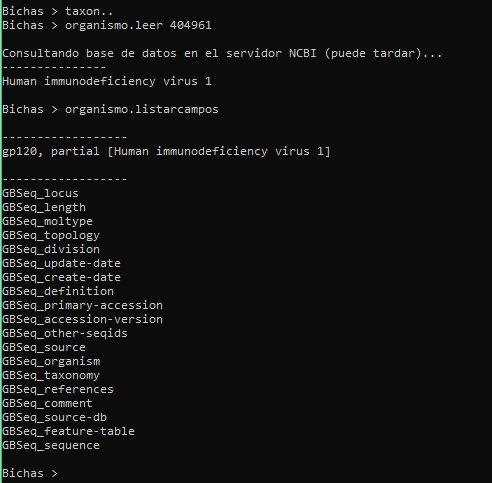

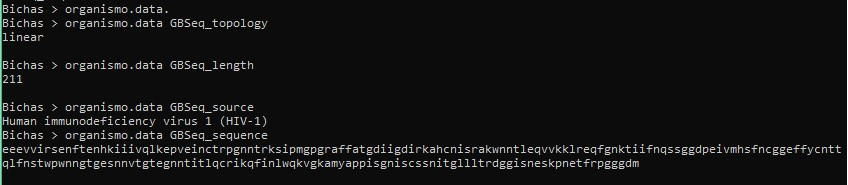


Para continuar con el ejemplo de buscar información sobre *Pithecellobium dulce*, hay que salirse de los campos del organismo anterior usando **organismo.data..** y vuelve a usarse el comando **organismo.leer** esta vez con el número de accesión del *P. dulce* en la librería de nucleótidos (MG572014):

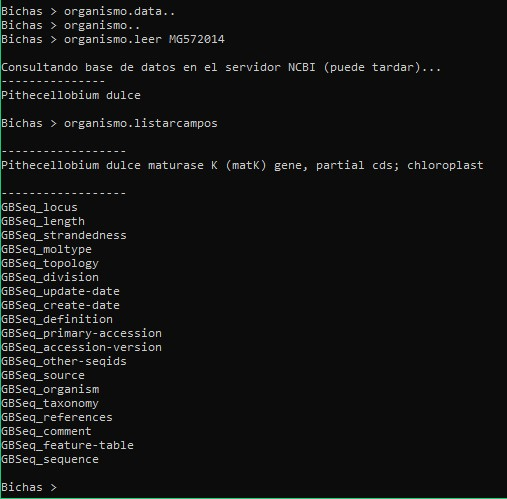


Si se quiere conocer la secuencia, qué tipo de molécula es o su topología; se utiliza nuevamente **organismo.data** y se escribe el campo que se desea consultar. Como puede observarse en la siguiente imagen, la consola devuelve la palabra “None” cuando el campo está mal escrito (dado que no puede encontrarlo). 

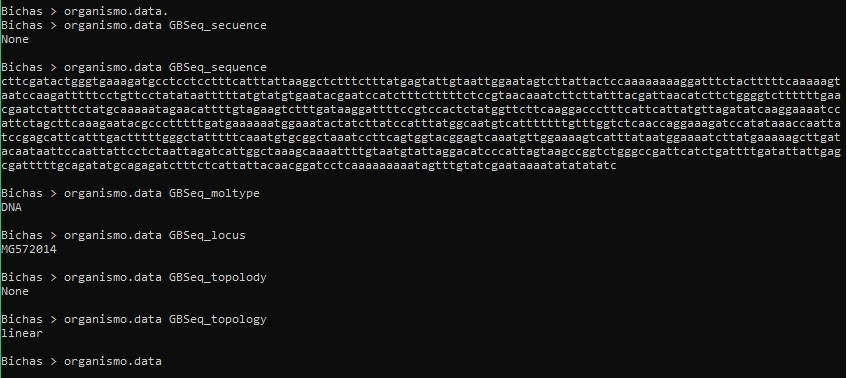


Para las búsquedas de secuencias, el parámetro requerido es el nombre del organismo (escrito luego de **orgn=** ); como se observa a continuación, el Id en este caso no es lo apropiado pues lo que se busca con este comando es que la consola devuelva el número de registros que poseen secuencias en la librería de nucleótidos, bajo el nombre del organismo dado.

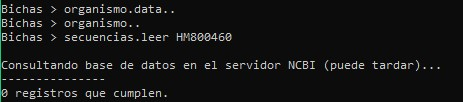


Así, una vez obtenido este valor (los registros) y listados los campos con el comando **secuencias.listarcampos** se puede consultar la lista de Id para investigarlos más a fondo con el comando **organismo.leer** y posteriormente extraer su secuencia:

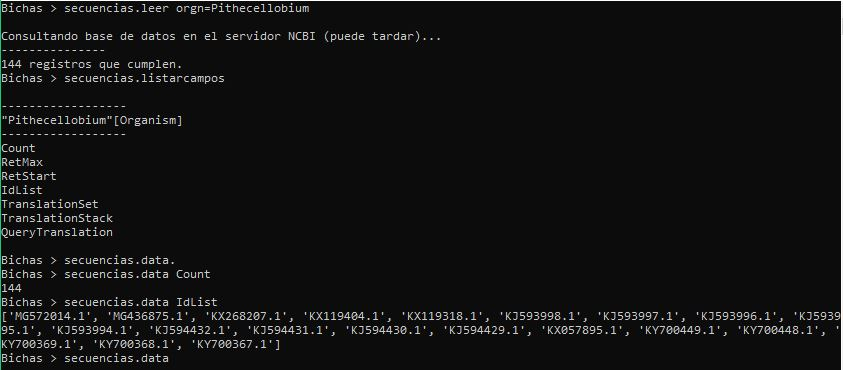


Al consultar el primer Id que aparece en la lista (con los comandos de organismo, previamente ejemplificados) se obtiene: 

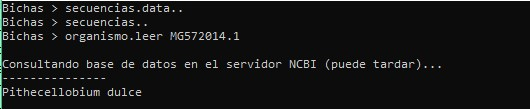


Para luego extraer su secuencia:

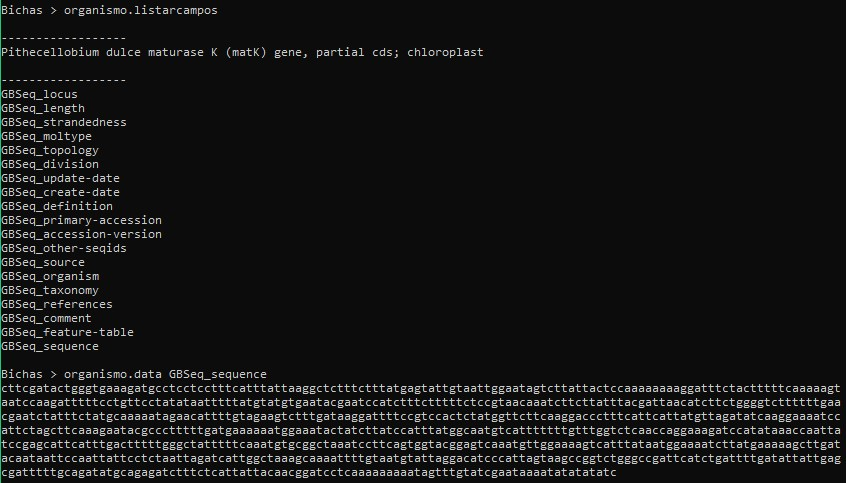

## Conclusiones

La idea de esta herramienta es poder consultar cualquier organismo; del organismo listar qué información hay disponible en la librería que se use y poder extraer la información más conveniente. A futuro dicha información se podrá enviar a otra herramienta para ser usada posteriormente, guardada en archivos o enviada por e-mail, con otros comandos (aún por crear).

La extracción de secuencias genéticas también será algo muy simple con esta herramienta; cuando  se tenga claro qué secuencia se quiere extraer y el registro buscado contenga campos que tengan secuencias genéticas, se podrán extraer esas secuencias concretas en rangos concretos; por ejemplo, a veces dichos archivos contienen distintos tipos de secuencias, por lo que se podrá indicar qué secuencias son las que se quieren extraer para un uso posterior de las mismas; por ejemplo en trimaje.

La herramienta podrá a futuro aplicarse de forma práctica a otras actividades comunes en trabajos investigativos (algunas de ellas practicadas en el curso), realizadas con otras herramientas. Por ejemplo, extraer una secuencia y su PhredList y trimarla; realizar ploting de la secuencia trimada y/o su PhredList; analizar la distancia Hamming o el ancestro común más reciente entre taxas, etc. Incluso añadir más librerías como PubMed para la búsqueda de artículos científicos relacionados a un organismo.
Toda esta colección de características genera mucha practicidad en la herramienta; a nivel de comando es lo que se busca, no tener la necesidad de estar copiando y pegando códigos en Python. 

Se busca realizar un código lo suficientemente genérico como para que se puedan tener muchas herramientas a la mano (que funcionen tanto para Linux, macOS y Windows) para utilizarlas más adelante en lo que se desee. La implementación o no de esta idea (más allá de que sea personal) quedará a consideraciones futuras; sin embargo, para el presente trabajo final de la materia Biología Computacional se presenta la versión básica de prueba.

Esta versión experimental dio buenos resultados y su creación permitió un mayor acercamiento tanto a la biología computacional como al diseño de soluciones a problemas investigativos que se observaron durante el curso y que se pueden optimizar. El que el usuario no tenga que buscar los scripts que necesita y pegarlos en otra plataforma para usarlos, permite tener una herramienta bioinformática muy práctica a nivel personal y para trabajar en el laboratorio.


##### Verónica Vélez Sampedro